In [1]:
!pip install pandas-datareader

In [2]:
import pandas_datareader as pdr
import pandas as pd
from datetime import datetime

In [3]:
stock = input("Enter the nasadq index: \n")
df = pdr.get_data_yahoo(stock)

Enter the nasadq index: 
TSLA


In [4]:
df.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2017-11-14,21.090000,20.459999,21.000000,20.580000,85141500.0,20.580000
2017-11-15,20.832666,20.100000,20.400667,20.753332,89680500.0,20.753332
2017-11-16,21.209333,20.753332,20.932667,20.833332,87331500.0,20.833332
2017-11-17,21.778000,20.876667,21.711332,21.003332,206026500.0,21.003332
2017-11-20,21.033333,20.316668,20.919333,20.582666,123715500.0,20.582666


In [5]:
import matplotlib.pyplot as plt



<AxesSubplot:xlabel='Date'>

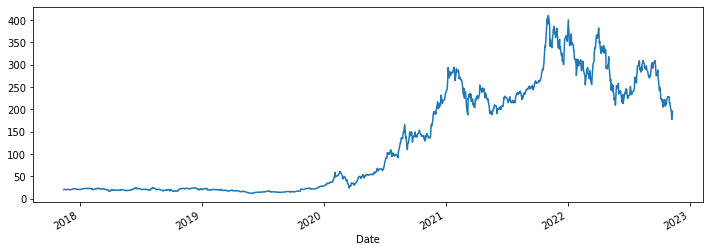

In [6]:
df['Close'].plot(figsize=(12,4))

In [7]:
import numpy as np

In [8]:
df1=df.reset_index()['Close']

In [9]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler(feature_range=(0,1))
df1=scaler.fit_transform(np.array(df1).reshape(-1,1))

In [10]:
df1

array([[0.02172821],
       [0.02216367],
       [0.02236466],
       ...,
       [0.41618736],
       [0.44917412],
       [0.46236379]])

In [11]:
##splitting dataset into train and test split
training_size=int(len(df1)*0.65)
test_size=len(df1)-training_size
train_data,test_data=df1[0:training_size,:],df1[training_size:len(df1),:1]

In [12]:
training_size,test_size

(817, 441)

In [13]:
import numpy
# convert an array of values into a dataset matrix
def create_dataset(dataset, time_step=1):
	dataX, dataY = [], []
	for i in range(len(dataset)-time_step-1):
		a = dataset[i:(i+time_step), 0]   ###i=0, 0,1,2,3-----99   100 
		dataX.append(a)
		dataY.append(dataset[i + time_step, 0])
	return numpy.array(dataX), numpy.array(dataY)

In [14]:
# reshape into X=t,t+1,t+2,t+3 and Y=t+4
time_step = 100
X_train, y_train = create_dataset(train_data, time_step)
X_test, ytest = create_dataset(test_data, time_step)

In [15]:
print(X_train.shape), print(y_train.shape)
print(X_test.shape), print(ytest.shape)

(716, 100)
(716,)
(340, 100)
(340,)


(None, None)

In [16]:
# reshape input to be [samples, time steps, features] which is required for LSTM
X_train =X_train.reshape(X_train.shape[0],X_train.shape[1] , 1)
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1] , 1)

In [17]:
#!pip install tensorflow

### Create the Stacked LSTM model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM

In [18]:
import tensorflow as tf

In [19]:
tf.__version__

'2.10.0'

In [20]:
model=Sequential()
model.add(LSTM(50,return_sequences=True,input_shape=(100,1)))
model.add(LSTM(50,return_sequences=True))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(loss='mean_squared_error',optimizer='adam')

In [21]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 100, 50)           10400     
                                                                 
 lstm_1 (LSTM)               (None, 100, 50)           20200     
                                                                 
 lstm_2 (LSTM)               (None, 50)                20200     
                                                                 
 dense (Dense)               (None, 1)                 51        
                                                                 
Total params: 50,851
Trainable params: 50,851
Non-trainable params: 0
_________________________________________________________________


In [22]:
model.fit(X_train,y_train,validation_data=(X_test,ytest),epochs=100,batch_size=64,verbose=1)

Epoch 1/100
12/12 [==============================] - 12s 295ms/step - loss: 0.0140 - val_loss: 0.0215
Epoch 2/100
12/12 [==============================] - 2s 178ms/step - loss: 0.0019 - val_loss: 0.0081
Epoch 3/100
12/12 [==============================] - 2s 184ms/step - loss: 9.0134e-04 - val_loss: 0.0131
Epoch 4/100
12/12 [==============================] - 2s 192ms/step - loss: 6.4885e-04 - val_loss: 0.0105
Epoch 5/100
12/12 [==============================] - 2s 177ms/step - loss: 5.4449e-04 - val_loss: 0.0085
Epoch 6/100
12/12 [==============================] - 2s 182ms/step - loss: 5.1571e-04 - val_loss: 0.0056
Epoch 7/100
12/12 [==============================] - 2s 181ms/step - loss: 5.5006e-04 - val_loss: 0.0051
Epoch 8/100
12/12 [==============================] - 2s 191ms/step - loss: 5.1339e-04 - val_loss: 0.0091
Epoch 9/100
12/12 [==============================] - 2s 191ms/step - loss: 6.8810e-04 - val_loss: 0.0077
Epoch 10/100
12/12 [==============================] - 2s 188ms

12/12 [==============================] - 2s 178ms/step - loss: 2.4027e-04 - val_loss: 0.0025
Epoch 79/100
12/12 [==============================] - 2s 176ms/step - loss: 2.3803e-04 - val_loss: 0.0019
Epoch 80/100
12/12 [==============================] - 2s 172ms/step - loss: 2.1833e-04 - val_loss: 0.0018
Epoch 81/100
12/12 [==============================] - 2s 172ms/step - loss: 2.5220e-04 - val_loss: 0.0034
Epoch 82/100
12/12 [==============================] - 2s 168ms/step - loss: 2.5137e-04 - val_loss: 0.0018
Epoch 83/100
12/12 [==============================] - 2s 165ms/step - loss: 2.2344e-04 - val_loss: 0.0025
Epoch 84/100
12/12 [==============================] - 2s 164ms/step - loss: 2.4827e-04 - val_loss: 0.0020
Epoch 85/100
12/12 [==============================] - 2s 166ms/step - loss: 2.1513e-04 - val_loss: 0.0017
Epoch 86/100
12/12 [==============================] - 2s 166ms/step - loss: 2.2466e-04 - val_loss: 0.0018
Epoch 87/100
12/12 [==============================] - 2s 17

In [23]:
### Lets Do the prediction and check performance metrics
train_predict=model.predict(X_train)
test_predict=model.predict(X_test)

11/11 [==============================] - 1s 105ms/step


In [24]:
##Transformback to original form
train_predict=scaler.inverse_transform(train_predict)
test_predict=scaler.inverse_transform(test_predict)

In [25]:
### Calculate RMSE performance metrics
import math
from sklearn.metrics import mean_squared_error
math.sqrt(mean_squared_error(y_train,train_predict))

84.85209721479896

In [26]:
math.sqrt(mean_squared_error(ytest,test_predict))

280.90812799844906

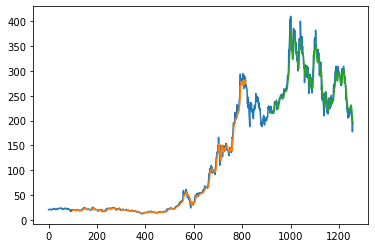

In [27]:
look_back=100
trainPredictPlot = numpy.empty_like(df1)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(train_predict)+look_back, :] = train_predict
# shift test predictions for plotting
testPredictPlot = numpy.empty_like(df1)
testPredictPlot[:, :] = numpy.nan
testPredictPlot[len(train_predict)+(look_back*2)+1:len(df1)-1, :] = test_predict
# plot baseline and predictions
plt.plot(scaler.inverse_transform(df1))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()

In [28]:
len(test_data)

441

In [29]:
x_input=test_data[341:].reshape(1,-1)
x_input.shape

(1, 100)

In [30]:
temp_input=list(x_input)
temp_input=temp_input[0].tolist()

In [31]:
# demonstrate prediction for next 10 days
from numpy import array

lst_output=[]
n_steps=100
i=0
while(i<30):
    
    if(len(temp_input)>100):
        #print(temp_input)
        x_input=np.array(temp_input[1:])
        print("{} day input {}".format(i,x_input))
        x_input=x_input.reshape(1,-1)
        x_input = x_input.reshape((1, n_steps, 1))
        #print(x_input)
        yhat = model.predict(x_input, verbose=0)
        print("{} day output {}".format(i,yhat))
        temp_input.extend(yhat[0].tolist())
        temp_input=temp_input[1:]
        #print(temp_input)
        lst_output.extend(yhat.tolist())
        i=i+1
    else:
        x_input = x_input.reshape((1, n_steps,1))
        yhat = model.predict(x_input, verbose=0)
        print(yhat[0])
        temp_input.extend(yhat[0].tolist())
        print(len(temp_input))
        lst_output.extend(yhat.tolist())
        i=i+1
    

print(lst_output)

[0.44150674]
101
1 day input [0.58731814 0.58534179 0.55454913 0.54406441 0.53397323 0.54098262
 0.55556244 0.55221269 0.58439549 0.60002211 0.55876985 0.55557083
 0.5655447  0.56874375 0.57314867 0.57435457 0.5868743  0.59182357
 0.65263843 0.65398675 0.64441474 0.62036348 0.66046014 0.675735
 0.71656018 0.71687844 0.72519421 0.74230309 0.74540999 0.69399961
 0.69966068 0.68184835 0.70954244 0.69013062 0.72379567 0.74713514
 0.74020947 0.73376122 0.73093065 0.71534589 0.69837938 0.71480996
 0.71642624 0.71384691 0.69379858 0.68558333 0.66769563 0.66244482
 0.66633896 0.64887831 0.65945523 0.68276954 0.69673803 0.72291635
 0.73482479 0.70394837 0.73027742 0.7331415  0.73213659 0.74650706
 0.74565288 0.72573013 0.69505474 0.66174137 0.66344981 0.68086016
 0.69309514 0.64385367 0.63641723 0.57901073 0.59669748 0.57501616
 0.56828316 0.53044765 0.53017129 0.51394169 0.51580082 0.527056
 0.48502492 0.52110182 0.52321216 0.52785992 0.49077811 0.50876632
 0.50075202 0.52881462 0.53439197 0.5

10 day output [[0.47718957]]
11 day input [0.55876985 0.55557083 0.5655447  0.56874375 0.57314867 0.57435457
 0.5868743  0.59182357 0.65263843 0.65398675 0.64441474 0.62036348
 0.66046014 0.675735   0.71656018 0.71687844 0.72519421 0.74230309
 0.74540999 0.69399961 0.69966068 0.68184835 0.70954244 0.69013062
 0.72379567 0.74713514 0.74020947 0.73376122 0.73093065 0.71534589
 0.69837938 0.71480996 0.71642624 0.71384691 0.69379858 0.68558333
 0.66769563 0.66244482 0.66633896 0.64887831 0.65945523 0.68276954
 0.69673803 0.72291635 0.73482479 0.70394837 0.73027742 0.7331415
 0.73213659 0.74650706 0.74565288 0.72573013 0.69505474 0.66174137
 0.66344981 0.68086016 0.69309514 0.64385367 0.63641723 0.57901073
 0.59669748 0.57501616 0.56828316 0.53044765 0.53017129 0.51394169
 0.51580082 0.527056   0.48502492 0.52110182 0.52321216 0.52785992
 0.49077811 0.50876632 0.50075202 0.52881462 0.53439197 0.5355225
 0.54413978 0.54167768 0.54238116 0.51012296 0.51095203 0.49125546
 0.46515247 0.45063127

19 day output [[0.49123892]]
20 day input [0.65398675 0.64441474 0.62036348 0.66046014 0.675735   0.71656018
 0.71687844 0.72519421 0.74230309 0.74540999 0.69399961 0.69966068
 0.68184835 0.70954244 0.69013062 0.72379567 0.74713514 0.74020947
 0.73376122 0.73093065 0.71534589 0.69837938 0.71480996 0.71642624
 0.71384691 0.69379858 0.68558333 0.66769563 0.66244482 0.66633896
 0.64887831 0.65945523 0.68276954 0.69673803 0.72291635 0.73482479
 0.70394837 0.73027742 0.7331415  0.73213659 0.74650706 0.74565288
 0.72573013 0.69505474 0.66174137 0.66344981 0.68086016 0.69309514
 0.64385367 0.63641723 0.57901073 0.59669748 0.57501616 0.56828316
 0.53044765 0.53017129 0.51394169 0.51580082 0.527056   0.48502492
 0.52110182 0.52321216 0.52785992 0.49077811 0.50876632 0.50075202
 0.52881462 0.53439197 0.5355225  0.54413978 0.54167768 0.54238116
 0.51012296 0.51095203 0.49125546 0.46515247 0.45063127 0.41618736
 0.44917412 0.46236379 0.44150674 0.44150215 0.44329712 0.44615409
 0.44978425 0.454001

27 day output [[0.48540223]]
28 day input [0.74230309 0.74540999 0.69399961 0.69966068 0.68184835 0.70954244
 0.69013062 0.72379567 0.74713514 0.74020947 0.73376122 0.73093065
 0.71534589 0.69837938 0.71480996 0.71642624 0.71384691 0.69379858
 0.68558333 0.66769563 0.66244482 0.66633896 0.64887831 0.65945523
 0.68276954 0.69673803 0.72291635 0.73482479 0.70394837 0.73027742
 0.7331415  0.73213659 0.74650706 0.74565288 0.72573013 0.69505474
 0.66174137 0.66344981 0.68086016 0.69309514 0.64385367 0.63641723
 0.57901073 0.59669748 0.57501616 0.56828316 0.53044765 0.53017129
 0.51394169 0.51580082 0.527056   0.48502492 0.52110182 0.52321216
 0.52785992 0.49077811 0.50876632 0.50075202 0.52881462 0.53439197
 0.5355225  0.54413978 0.54167768 0.54238116 0.51012296 0.51095203
 0.49125546 0.46515247 0.45063127 0.41618736 0.44917412 0.46236379
 0.44150674 0.44150215 0.44329712 0.44615409 0.44978425 0.45400167
 0.45861948 0.46343735 0.46825647 0.47289294 0.47718957 0.4810217
 0.48430085 0.4869749

In [32]:
day_new=np.arange(1,101)
day_pred=np.arange(101,131)

In [33]:
import matplotlib.pyplot as plt

In [34]:
len(df1)

1258

In [35]:
len(lst_output)
len(test_data)

441

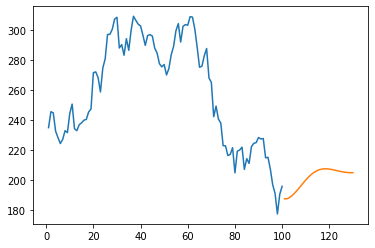

In [40]:
plt.plot(day_new,scaler.inverse_transform(df1[1158:]))
plt.plot(day_pred,scaler.inverse_transform(lst_output))

In [41]:
#len(df1[802:]

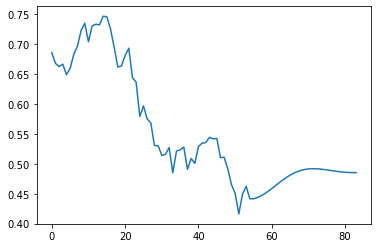

In [42]:
df3=df1.tolist()
df3.extend(lst_output)
plt.plot(df3[1204:])

In [43]:
df3=scaler.inverse_transform(df3).tolist()

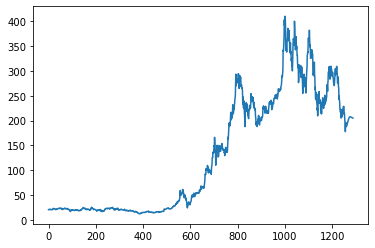

In [44]:
plt.plot(df3)